In [39]:
from PIL import Image
import numpy as np
import os
import tensorflow as tf
from architectures import ResNet50 

# Load Model

In [40]:
np.random.seed(1)
tf.random.set_seed(1234)
model = ResNet50.MyModel()
model.load_weights('Models/ModelResnet50/Resnet50_tf_batch32_NoPretrained').expect_partial()

# Load Data

In [29]:
year = 2016
path = f'../GoogleEarthEngine/patches/{year}/'

# number of patches each month
for month in os.listdir(path):
    if month == '.DS_Store':
        continue
    patches_path = os.path.join(path, month)
    print(f'The number of patches in {month} of {year} are: {len(os.listdir(patches_path))}')

        
        

The number of patches in 9 of 2016 are: 23
The number of patches in 11 of 2016 are: 23
The number of patches in 7 of 2016 are: 33
The number of patches in 6 of 2016 are: 33
The number of patches in 1 of 2016 are: 31
The number of patches in 10 of 2016 are: 15
The number of patches in 8 of 2016 are: 33
The number of patches in 4 of 2016 are: 33
The number of patches in 3 of 2016 are: 30
The number of patches in 12 of 2016 are: 25
The number of patches in 2 of 2016 are: 26
The number of patches in 5 of 2016 are: 33


In [30]:
month = 8
path = f'../GoogleEarthEngine/patches/{year}/{month}/'

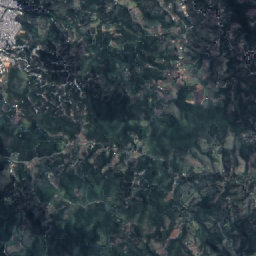

In [31]:
# Show a single image
image = Image.open(path + os.listdir(path)[2])
image

# Load a batch of images

In [32]:
def get_batch(path, normalize = None):

    for i, patch in enumerate(os.listdir(path)):
        image_path = os.path.join(path, patch)
        image = np.array(Image.open(image_path))
        if normalize:
            image = image/255.
        image = np.expand_dims(image, axis=0)
        if i == 0:
            images_batch = image
        else:
            images_batch = np.append(images_batch, image, axis=0)
    print(f'numpy array with shape {images_batch.shape} created')
    print(f'The min value is {images_batch.min()} and max is {images_batch.max()}')
    return images_batch

In [33]:
batch = get_batch(path, normalize=True)

numpy array with shape (33, 256, 256, 3) created
The min value is 0.0 and max is 1.0


# Predict with model

In [34]:
predictions = model.predict(batch)

In [35]:
print('the predictions are: ')
# Transform predictions to 0 or 1
predictions = np.rint(predictions)
predictions

the predictions are: 


array([[1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1., 0.],
 

# Compare

In [36]:
# Select Tags
list_tags = ['agriculture', 'bare_ground', 'cultivation', 'habitation', 'primary', 'road', 'water']

In [37]:
index = [0, 3, 5, 6]

tag_popayan = {}

for i in range(len(list_tags)):
    if i in index:
        tag_popayan[list_tags[i]] = predictions[:,i].sum()

tag_popayan

{'agriculture': 9.0, 'habitation': 28.0, 'road': 22.0, 'water': 15.0}

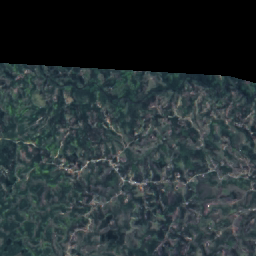

In [38]:
Image.open(path + os.listdir(path)[30])